In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from data import load_database_train
from preprocessing import InterpolateRawData
from train import grid_search, scikit_train_validate
from sklearn.model_selection import cross_val_score
from cross_validation import cv_folds_author
import numpy as np
from plotter import plot_all_readings


%matplotlib inline

In [2]:
database_train = load_database_train()
X_processed = InterpolateRawData(num_samples=40).fit_transform(database_train.X)

## KNN - Kth Nearest Neighbors

A classe KNeighborsClassifier implementa classificação através do algoritmo de voto dos k vizinhos mais próximos.
Vamos analisar como os parâmetros deste algoritmo funcionam para classicação dos feitiços.

dict_keys(['memory', 'steps', 'verbose', 'knn', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    6.6s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    7.4s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   11.6s
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:   13.8s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed:   22.1s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:   34.1s
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed:   51.3s
[Parallel(n_jobs=6)]: Done 150 out of 150 | elapsed:  1.1min finished


,params,mean_train_score,std_train_score,mean_test_score,std_test_score
0,"{'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__p': 3, 'knn__weights': 'uniform'}",0.97,0.01,0.70,0.21
1,"{'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__p': 3, 'knn__weights': 'distance'}",1.00,0.00,0.70,0.20
2,"{'knn__metric': 'euclidean', 'knn__n_neighbors': 15, 'knn__p': 3, 'knn__weights': 'uniform'}",0.90,0.03,0.70,0.17
3,"{'knn__metric': 'euclidean', 'knn__n_neighbors': 15, 'knn__p': 3, 'knn__weights': 'distance'}",1.00,0.00,0.71,0.17
4,"{'knn__metric': 'euclidean', 'knn__n_neighbors': 21, 'knn__p': 3, 'knn__weights': 'uniform'}",0.88,0.03,0.68,0.16
5,"{'knn__metric': 'euclidean', 'knn__n_neighbors': 21, 'knn__p': 3, 'knn__weights': 'distance'}",1.00,0.00,0.70,0.16
6,"{'knn__metric': 'euclidean', 'knn__n_neighbors': 51, 'knn__p': 3, 'knn__weights': 'uniform'}",0.76,0.04,0.61,0.16
7,"{'knn__metric': 'euclidean', 'knn__n_neighbors': 51, 'knn__p': 3, 'knn__weights': 'distance'}",1.00,0.00,0.64,0.13
8,"{'knn__metric': 'euclidean', 'knn__n_neighbors': 101, 'knn__p': 3, 'knn__weights': 'uniform'}",0.65,0.04,0.54,0.22
9,"{'knn__metric': 'euclidean', 'knn__n_neighbors': 101, 'knn__p': 3, 'knn__weights': 'distance'}",1.00,0.00,0.58,0.21


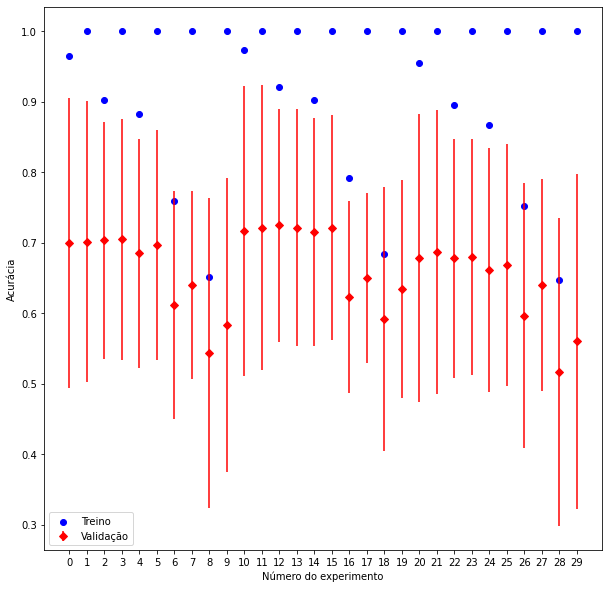

,params,mean_train_score,std_train_score,mean_test_score,std_test_score
12,"{'knn__metric': 'manhattan', 'knn__n_neighbors': 15, 'knn__p': 3, 'knn__weights': 'uniform'}",0.92,0.02,0.72,0.17


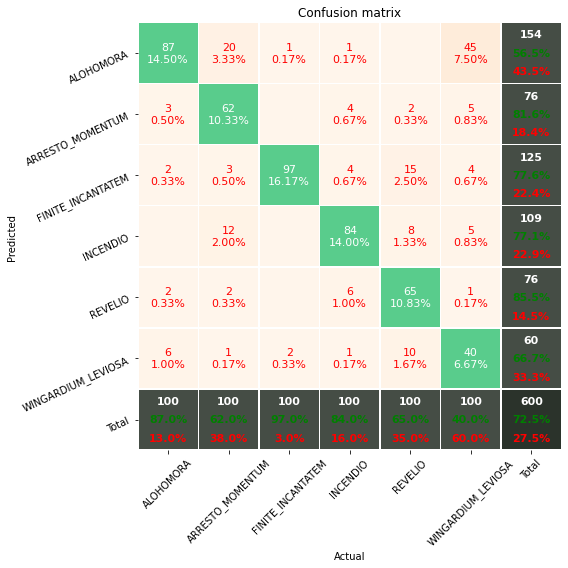

Pipeline(steps=[('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=15,
                                      p=3))])

In [3]:
pipe = Pipeline([
    ('knn', KNeighborsClassifier())
])

print(pipe.get_params().keys())

parameters = {
    'knn__weights': ['uniform', 'distance'],
    'knn__n_neighbors': [5, 15, 21, 51, 101],
    'knn__p': [3],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search(pipe, parameters, X_processed, database_train.y, database_train.cv_author, n_jobs=6)

### Quantidade de vizinhos

O número de vizinho define a quantia de vizinhos cuja distância será usada na classificação. Se utilizarmos cinco, a distância total considerada será a distância entre o indíviduo a ser classificado e seus 5 vizinhos mais próximos.

Note que, os números de vizinhos utilizados serão sempre ímpares, para evitar empates na votação.

In [ ]:
pipe = Pipeline([
    ('knn', KNeighborsClassifier(weights='uniform', metric='manhattan'))
])

parameters = {
    'knn__n_neighbors': [5, 15, 21, 51, 101]
}
grid_search(pipe, parameters, X_processed, database_train.y, database_train.cv_author, n_jobs=6)

### Peso dos vizinhos
Este parâmetro define de que forma os vizinhos irão influenciar o indivíduo a ser classificado: **uniforme** ou por  **distância**. Uniformemente significa que a distância não influencia no voto de cada vizinho e por distância significa que o peso será igual ao inverso da distância.

In [ ]:
pipe = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors = 15, metric = 'manhattan'))
])

parameters = {
    'knn__weights': ['uniform', 'distance']
}
grid_search(pipe, parameters, X_processed, database_train.y, database_train.cv_author, n_jobs=6)

### Algorithm
Qual algoritmo será usado para computar os vizinhos mais próximos.

In [ ]:
pipe = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors = 15, metric = 'manhattan', weights="uniform"))
])

parameters = {
    'knn__algorithm': ['ball_tree', 'kd_tree', 'brute']
}
grid_search(pipe, parameters, X_processed, database_train.y, database_train.cv_author, n_jobs=6)

O algoritmo usado não influencia na acurácia obtida. Considerando que estes computem os vizinhos próximos corretamente, este resultado é esperado.

### Cálculo de distância

KNN é um algoritmo baseado em distância, desta forma, precisamos calcular a distância entre o indivíduo a ser classificado e seus vizinhos. A classe KNeighborsClassifier aceita o parâmetro de qual será a métrica será utilizada no cálculo da distância, como distância euclidiana ou de manhattan, por exemplo.

No experimento utilizaremos a distâncias euclidiana, distância de Manhattan, de Chebyshev e de Minkowski.

O parâmetro p é utilizando somente na distância de minkowski. Esta distância segue a seguinte fórmula:
distância de minkowski = sum(|x - y|^p)^(1/p)

In [ ]:
pipe = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors = 15, weights = 'uniform'))
])

parameters = {
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [3]
}
grid_search(pipe, parameters, X_processed, database_train.y, database_train.cv_author, n_jobs=6)

#### Distância de Minkowski

Como visto no experimento acima, a distância de Minkowski reage pior do que as distâncias euclidiana e de Manhattan com p = 3. Portanto, testaremos como esta distância reage com p maiores.

É importante notar que utilizar p = 1 é equivalente a distância de Manhattan e p = 2 é equivalente a distância euclidiana.

In [ ]:
pipe = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors = 15, weights = 'uniform'))
])

parameters = {
    'knn__metric': ['minkowski'],
    'knn__p': [3, 5, 10, 20]
}
grid_search(pipe, parameters, X_processed, database_train.y, database_train.cv_author, n_jobs=6)

O experimento acima, nos mostra que p = 3 atinge o melhor resultado com a distância de Minkowski, portanto, vimos que as distâncias de Manhattan e euclidiana realmente reagem melhor ao nosso problema.